# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [79]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [80]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [81]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [82]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

Предобработка данных:


In [83]:
data = data.convert_dtypes()
print("Data types for each columns:")
print(data.dtypes)
print("Data before replacing: ")
for i in data.columns:
    print(i, end=" ")
    print(data[i].unique())
data.sex.replace(to_replace={"m" : "M"}, inplace=True)
data.Pstatus.replace(to_replace={"t" : "T"}, inplace=True)
data.Medu.replace(to_replace={"o" : '0', 0:'0'}, inplace=True)
data.Fedu.replace(to_replace={"o" : '0', 0:'0'}, inplace=True)
data.Mjob.replace(to_replace={"at-home" : "at_home"}, inplace=True)
data.Fjob.replace(to_replace={"at-home" : "at_home"}, inplace=True)
data.guardian.replace(to_replace={"futher" : "father"}, inplace=True)
data = data.convert_dtypes()
data["Fedu"] = data["Fedu"].astype(int)
data["Medu"] = data["Medu"].astype(int)
print("Data after replacing: ")
for i in data.columns:
    print(i, end=" ")
    print(data[i].unique())
data = data.drop("ID", axis = 1)
data.info()

Data types for each columns:
ID             Int64
Subject       string
school        string
sex           string
age            Int64
address       string
famsize       string
Pstatus       string
Medu          string
Fedu          string
Mjob          string
Fjob          string
reason        string
guardian      string
traveltime     Int64
studytime      Int64
failures       Int64
schoolsup     string
famsup        string
paid          string
activities    string
nursery       string
higher        string
internet      string
romantic      string
famrel         Int64
freetime       Int64
goout          Int64
Dalc           Int64
Walc           Int64
health         Int64
absences       Int64
cheating      string
G1             Int64
G2             Int64
G3             Int64
dtype: object
Data before replacing: 
ID <IntegerArray>
[100097, 101021, 102965, 102989, 103131, 103144, 105257, 107639, 107914,
 108089,
 ...
 990885, 990942, 993398, 995838, 996164, 997832, 997897, 998425, 999143,

In [84]:
print("Number of NaN: " + str(data.isna().sum().sum()))
print("Columns that contains Nan:", end=" ")
print(data.columns[data.isna().any()].tolist())
print(data.isna().sum())
data["cheating"] = data["cheating"].fillna("no")
data = data.dropna()
data

Number of NaN: 740
Columns that contains Nan: ['romantic', 'famrel', 'Dalc', 'Walc', 'cheating']
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel         10
freetime        0
goout           0
Dalc           10
Walc           10
health          0
absences        0
cheating      700
G1              0
G2              0
G3              0
dtype: int64


,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,12,no,15,13,14
1,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,2,no,17,18,17
2,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,yes,9,8,10
3,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4,4,3,1,1,3,4,no,14,15,16
5,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3,3,4,4,5,4,2,no,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Por,MS,F,15,R,GT3,T,3,3,services,other,reputation,mother,1,2,0,no,yes,no,no,yes,yes,yes,yes,4,5,4,1,1,1,4,no,13,12,12
1038,Por,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,no,13,12,13
1039,Math,GP,F,15,R,GT3,T,3,3,services,services,reputation,other,2,3,2,no,yes,yes,yes,yes,yes,yes,yes,4,2,1,2,3,3,8,no,10,10,10
1040,Por,GP,M,15,R,GT3,T,2,1,health,services,reputation,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,5,4,2,1,1,5,4,no,10,9,10


Зависимость итоговой оценки от числовых признаков:

In [85]:
cor = data.corr()
cor["G3"]

age          -0.117976
Medu          0.207814
Fedu          0.164776
traveltime   -0.112519
studytime     0.158775
failures     -0.382542
famrel        0.052474
freetime     -0.057242
goout        -0.092770
Dalc         -0.125858
Walc         -0.110614
health       -0.070054
absences     -0.043690
G1            0.807610
G2            0.910560
G3            1.000000
Name: G3, dtype: float64

Зависимость итоговой оценки от категориальных признаков:


In [86]:
categoricalColumns = ["Subject", "school", "sex", "address", "famsize", "Pstatus",
                          "Mjob", "Fjob", "reason", "guardian",
                          "schoolsup", "famsup", "paid", "activities", "nursery",
                          "higher", "internet", "romantic", "cheating"]
df = pd.get_dummies(data = data[categoricalColumns], prefix=categoricalColumns, columns = categoricalColumns)
df["G3"] = data["G3"]
cor = df.corr()
cor["G3"]

Subject_Math        -0.194425
Subject_Por          0.194425
school_GP            0.116344
school_MS           -0.116344
sex_F                0.029187
sex_M               -0.029187
address_R           -0.112852
address_U            0.112852
famsize_GT3         -0.056160
famsize_LE3          0.056160
Pstatus_A            0.023798
Pstatus_T           -0.023798
Mjob_at_home        -0.111212
Mjob_health          0.104835
Mjob_other          -0.072740
Mjob_services        0.047449
Mjob_teacher         0.093376
Fjob_at_home        -0.020266
Fjob_health          0.045908
Fjob_other          -0.032220
Fjob_services       -0.027232
Fjob_teacher         0.101718
reason_course       -0.085107
reason_home          0.008895
reason_other        -0.046167
reason_reputation    0.123305
guardian_father      0.044285
guardian_mother      0.006613
guardian_other      -0.085447
schoolsup_no         0.069563
schoolsup_yes       -0.069563
famsup_no           -0.016054
famsup_yes           0.016054
paid_no   

Исходя из полученных данных я решил, что можно убрать все признаки, где коэффицент корреляции по модую меньше 0.07.

In [87]:
data = data.drop(columns=["sex", "famsize", "Pstatus", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "cheating",
                         "famrel", "freetime", "absences"], )
data

,Subject,school,age,address,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,higher,internet,romantic,goout,Dalc,Walc,health,G1,G2,G3
0,Por,GP,16,U,3,4,services,other,course,1,1,0,yes,yes,no,1,1,4,5,15,13,14
1,Por,GP,17,U,3,2,other,other,course,1,2,0,yes,yes,no,4,1,3,3,17,18,17
2,Por,GP,16,U,1,2,health,services,course,2,1,2,yes,yes,no,5,3,5,5,9,8,10
3,Por,MS,17,U,2,3,other,services,home,2,2,0,yes,yes,no,3,1,1,3,14,15,16
5,Por,GP,18,U,3,1,services,services,course,2,1,0,yes,yes,yes,4,4,5,4,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Por,MS,15,R,3,3,services,other,reputation,1,2,0,yes,yes,yes,4,1,1,1,13,12,12
1038,Por,GP,16,U,2,2,other,other,home,1,2,0,yes,yes,no,4,1,1,3,13,12,13
1039,Math,GP,15,R,3,3,services,services,reputation,2,3,2,yes,yes,yes,1,2,3,3,10,10,10
1040,Por,GP,15,R,2,1,health,services,reputation,1,2,0,yes,yes,yes,2,1,1,5,10,9,10


Снижение количества признаков поможет получить более высокое качество обучения моделей

После удаления признаков нужно до конца обработать данные

In [88]:
from sklearn.preprocessing import normalize 

In [89]:
categoricalColumns = ["Subject", "school", "address",
                          "Mjob", "Fjob", "reason",
                          "higher", "internet", "romantic"]
data = pd.get_dummies(data = data[categoricalColumns], prefix=categoricalColumns, columns = categoricalColumns).join(data)
data = data.drop(columns=categoricalColumns)
columns = data.columns
target = data["G3"]
data = pd.DataFrame(normalize(data), columns=columns)
data


,Subject_Math,Subject_Por,school_GP,school_MS,address_R,address_U,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,goout,Dalc,Walc,health,G1,G2,G3
0,0.0000,0.032880,0.032880,0.000000,0.000000,0.032880,0.000000,0.000000,0.000000,0.032880,0.0,0.0,0.0,0.032880,0.000000,0.0,0.032880,0.000000,0.0,0.000000,0.0,0.032880,0.000000,0.032880,0.032880,0.000000,0.526077,0.098639,0.131519,0.032880,0.032880,0.000000,0.032880,0.032880,0.131519,0.164399,0.493197,0.427437,0.460317
1,0.0000,0.028250,0.028250,0.000000,0.000000,0.028250,0.000000,0.000000,0.028250,0.000000,0.0,0.0,0.0,0.028250,0.000000,0.0,0.028250,0.000000,0.0,0.000000,0.0,0.028250,0.000000,0.028250,0.028250,0.000000,0.480257,0.084751,0.056501,0.028250,0.056501,0.000000,0.113002,0.028250,0.084751,0.084751,0.480257,0.508507,0.480257
2,0.0000,0.040555,0.040555,0.000000,0.000000,0.040555,0.000000,0.040555,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.040555,0.0,0.040555,0.000000,0.0,0.000000,0.0,0.040555,0.000000,0.040555,0.040555,0.000000,0.648886,0.040555,0.081111,0.081111,0.040555,0.081111,0.202777,0.121666,0.202777,0.202777,0.364998,0.324443,0.405554
3,0.0000,0.031373,0.000000,0.031373,0.000000,0.031373,0.000000,0.000000,0.031373,0.000000,0.0,0.0,0.0,0.000000,0.031373,0.0,0.000000,0.031373,0.0,0.000000,0.0,0.031373,0.000000,0.031373,0.031373,0.000000,0.533337,0.062746,0.094118,0.062746,0.062746,0.000000,0.094118,0.031373,0.031373,0.094118,0.439219,0.470592,0.501965
4,0.0000,0.035202,0.035202,0.000000,0.000000,0.035202,0.000000,0.000000,0.000000,0.035202,0.0,0.0,0.0,0.000000,0.035202,0.0,0.035202,0.000000,0.0,0.000000,0.0,0.035202,0.000000,0.035202,0.000000,0.035202,0.633630,0.105605,0.035202,0.070403,0.035202,0.000000,0.140807,0.140807,0.176008,0.140807,0.387218,0.387218,0.422420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0.0000,0.036936,0.000000,0.036936,0.036936,0.000000,0.000000,0.000000,0.000000,0.036936,0.0,0.0,0.0,0.036936,0.000000,0.0,0.000000,0.000000,0.0,0.036936,0.0,0.036936,0.000000,0.036936,0.000000,0.036936,0.554038,0.110808,0.110808,0.036936,0.073872,0.000000,0.147743,0.036936,0.036936,0.036936,0.480166,0.443230,0.443230
1000,0.0000,0.035646,0.035646,0.000000,0.000000,0.035646,0.000000,0.000000,0.035646,0.000000,0.0,0.0,0.0,0.035646,0.000000,0.0,0.000000,0.035646,0.0,0.000000,0.0,0.035646,0.000000,0.035646,0.035646,0.000000,0.570338,0.071292,0.071292,0.035646,0.071292,0.000000,0.142585,0.035646,0.035646,0.106938,0.463400,0.427754,0.463400
1001,0.0411,0.000000,0.041100,0.000000,0.041100,0.000000,0.000000,0.000000,0.000000,0.041100,0.0,0.0,0.0,0.000000,0.041100,0.0,0.000000,0.000000,0.0,0.041100,0.0,0.041100,0.000000,0.041100,0.000000,0.041100,0.616496,0.123299,0.123299,0.082199,0.123299,0.082199,0.041100,0.082199,0.123299,0.123299,0.410997,0.410997,0.410997
1002,0.0000,0.042409,0.042409,0.000000,0.042409,0.000000,0.000000,0.042409,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.042409,0.0,0.000000,0.000000,0.0,0.042409,0.0,0.042409,0.000000,0.042409,0.000000,0.042409,0.636142,0.084819,0.042409,0.042409,0.084819,0.000000,0.084819,0.042409,0.042409,0.212047,0.424094,0.381685,0.424094


Разделение данных:

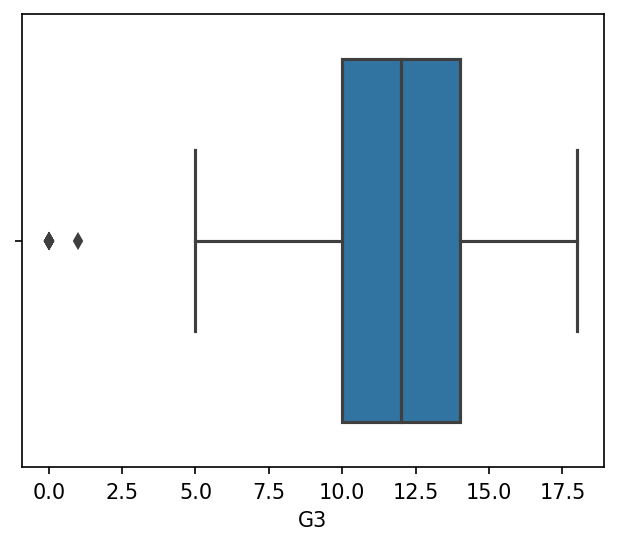

In [90]:
from sklearn.model_selection import train_test_split
plt.figure(figsize=(5, 4), dpi=150)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["G3"]), target, test_size=0.2)
sns.boxplot(y_test)
plt.show()

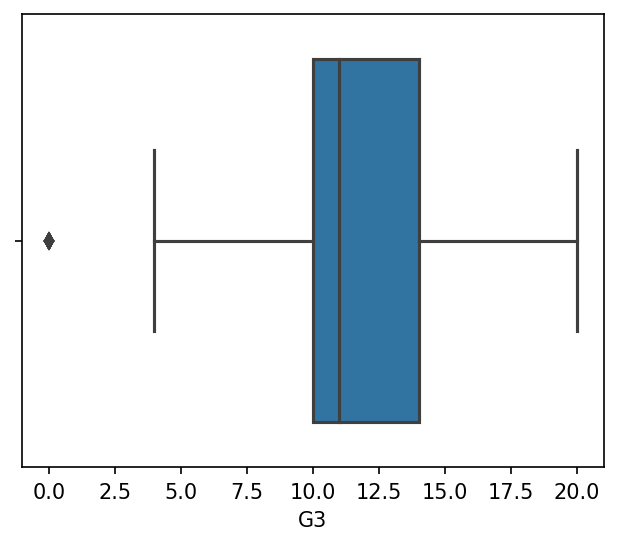

In [91]:
plt.figure(figsize=(5, 4), dpi=150)
sns.boxplot(y_train)
plt.show()

Как мы видим из этих графиков распределение целевой переменной в нашем разбиение примерно одинаковое.

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

#### Линейная регрессия + регуляризации

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [93]:
data_train = X_train.drop(columns=["G2"])
linreg = LinearRegression()
linreg.fit(data_train, y_train)
y_pred = linreg.predict(X_test.drop(columns=["G2"]))

In [94]:
print("Test Linear:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Linear:
MSE: 0.9781725379360724
MAE: 0.6654310027363358
R2: 0.926806903292732


In [95]:
coefs = pd.Series(linreg.coef_, index=data_train.columns)
z = abs(coefs).sort_values(ascending=False)
coefs[z.index]

Subject_Math        -49.331919
romantic_yes        -48.075909
higher_no           -47.653857
school_GP           -47.012385
internet_yes        -46.499284
address_U           -46.360731
address_R           -46.136075
internet_no         -45.997522
school_MS           -45.484421
higher_yes          -44.842950
romantic_no         -44.420898
Subject_Por         -43.164888
age                 -28.196225
reason_other        -26.559206
Fjob_teacher        -25.340597
reason_home         -23.301107
reason_reputation   -22.137480
reason_course       -20.499014
Mjob_other          -20.280250
Mjob_health         -20.154253
Fjob_services       -19.624854
Mjob_at_home        -18.911126
G1                  -18.862412
Mjob_services       -17.222368
Fjob_health         -16.365491
Mjob_teacher        -15.928810
Fjob_other          -15.771871
Fjob_at_home        -15.393993
Dalc                 -5.915890
goout                -5.168651
health               -5.110926
failures             -4.708951
Medu    

Я не вижу никакой зависимости в таком распределении коэффицентов.

In [96]:
linreg = LinearRegression()
linreg.fit(data_train.drop(columns=["G1"]), y_train)
y_pred = linreg.predict(X_test.drop(columns=["G2", "G1"]))

In [97]:
print("Test Linear without G1:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Linear without G1:
MSE: 1.6437034386665192
MAE: 0.8360263033844109
R2: 0.8770076442769136


Без G1 точность линейной модели упала.

In [98]:
from sklearn.linear_model import RidgeCV

In [99]:
ridgeModel = RidgeCV(alphas=np.arange(0, 30, 0.1), 
                                  cv=5, 
                                  scoring='neg_root_mean_squared_error')
ridgeModel.fit(data_train, y_train)
y_pred = ridgeModel.predict(X_test.drop(columns=["G2"]))

In [100]:
print("Test Ridge:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Ridge:
MSE: 0.9781725379360742
MAE: 0.6654310027363355
R2: 0.9268069032927317


Ridge показало примерно такие же результаты, чем обычная линейная регрессия.

In [101]:
from sklearn.linear_model import LassoCV

In [102]:
lassoModel = LassoCV(alphas=np.arange(0.1, 100, 0.1), 
                                  normalize=True,
                                  cv=5)
lassoModel.fit(data_train, y_train)
y_pred = lassoModel.predict(X_test.drop(columns=["G2"]))

In [103]:
print("Test Lasso:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Lasso:
MSE: 9.485726081989563
MAE: 2.1784433015875786
R2: 0.2902175848008809


А Lasso показало не лучшие результаты и не справилось с задачей

#### Полиномиальная регрессия

In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [105]:
poly = PolynomialFeatures(degree=4)
poly.fit(data_train)
poly_train = poly.transform(data_train)
poly_test = poly.transform(X_test.drop(columns=["G2"]))

In [106]:
linreg = LinearRegression()
linreg.fit(poly_train, y_train)
y_pred = linreg.predict(poly_test)

In [107]:
print("Test Polynomial:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Polynomial:
MSE: 5.457002341019531
MAE: 1.4400215127493476
R2: 0.5916723434898412


In [108]:
coefs = pd.Series(linreg.coef_)
z = abs(coefs).sort_values(ascending=False)
coefs[z.index]

100554   -905.372429
9594      886.232608
685       705.386318
1910     -689.393732
1244      668.615963
             ...    
56535       0.000000
56534       0.000000
56533       0.000000
56532       0.000000
43164       0.000000
Length: 101270, dtype: float64

Слишком много параметров, чтобы определить параметр, который имеет наибольшее влияние.

In [109]:
poly = PolynomialFeatures(degree=4)
poly.fit(data_train.drop(columns=["G1"]))
poly_train = poly.transform(data_train.drop(columns=["G1"]))
poly_test = poly.transform(X_test.drop(columns=["G2", "G1"]))

In [110]:
linreg = LinearRegression()
linreg.fit(poly_train, y_train)
y_pred = linreg.predict(poly_test)

In [111]:
print("Test Polynomial without G1:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Polynomial without G1:
MSE: 14.073972864320444
MAE: 2.330236388416635
R2: -0.05310424997946073


Без G1, судя по метрикам, не получилось построить хорошую модель для предсказания целевой переменной.

#### KNN

In [112]:
from sklearn.neighbors import KNeighborsRegressor


In [113]:
param_grid = {'n_neighbors':range(1, 16), 'weights':['uniform', 'distance']}
grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid=param_grid, scoring='r2')
grid.fit(data_train, y_train)
y_pred = grid.predict(X_test.drop(columns=["G2"]))

In [114]:
print("Test KNN:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test KNN:
MSE: 2.9213504824483176
MAE: 1.1349598519359674
R2: 0.781405958473516


In [115]:
param_grid = {'n_neighbors':range(1, 16), 'weights':['uniform', 'distance']}
grid = GridSearchCV(estimator = KNeighborsRegressor(), param_grid=param_grid, scoring='r2')
grid.fit(data_train.drop(columns=["G1"]), y_train)
y_pred = grid.predict(X_test.drop(columns=["G2", "G1"]))

In [116]:
print("Test KNN without G1:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test KNN without G1:
MSE: 2.8640058973617593
MAE: 1.121459789617394
R2: 0.7856968454071593


Как не странно, но без G1 в KNN получились лучше резултаты по R2, но хуже по MSE и MAE

#### Деревья решений, Random Forest

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
dt_model = DecisionTreeRegressor()
dt_model.fit(data_train, y_train)
y_pred = dt_model.predict(X_test.drop(columns=["G2"]))

In [119]:
print("Test Decision Tree:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Decision Tree:
MSE: 2.0348258706467663
MAE: 0.8009950248756219
R2: 0.8477413738817995


In [120]:
rf_model = DecisionTreeRegressor()
y_train=y_train.astype('int')
rf_model.fit(data_train.drop(columns=["G1"]), y_train)
y_pred = rf_model.predict(X_test.drop(columns=["G2", "G1"]))

In [121]:
print("Test Decision Tree without G1:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Decision Tree without G1:
MSE: 2.6616915422885574
MAE: 0.9104477611940298
R2: 0.8008352934639675


Без G1 метрики получаются хуже.

#### RandomForest:

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()
y_train=y_train.astype('int')
rf_model.fit(data_train, y_train)
y_pred = rf_model.predict(X_test.drop(columns=["G2"]))

In [125]:
print("Test Random Forest:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Random Forest:
MSE: 1.1219203980099504
MAE: 0.649452736318408
R2: 0.916050773248384


In [126]:
rf_model = RandomForestRegressor()
y_train=y_train.astype('int')
rf_model.fit(data_train.drop(columns=["G1"]), y_train)
y_pred = rf_model.predict(X_test.drop(columns=["G2", "G1"]))

In [127]:
print("Test Random Forest without G1:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Test Random Forest without G1:
MSE: 1.4948661691542289
MAE: 0.7299004975124378
R2: 0.8881445963365622


Random Forest без G1 тоже показал более плохие результаты


#### Выводы:

Лучшие результаты показали Ridge и Linear регрессии. Они имели наименьшее значение отклонения от истинного результата.

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [ ]:
data_train = data_train.drop(columns=["G1"])

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [ ]:
# your code here

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [ ]:
# your code here

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [ ]:
# your code here

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [ ]:
# your code here

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

#### KNN

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def from20to4(x):
    if 20>=x>=17.5:
        return "Excellent"
    elif 17.5>x>=13.5:
        return "Good"
    if 13.5>x>=7.5:
        return "Sad"
    elif 7.5>x>=0:
        return "Bad"

In [ ]:
y_test_ = list(map(from20to4, y_test))
y_train_ = list(map(from20to4, y_train))

param = {'n_neighbors': range(2, 30)}
grid = GridSearchCV(KNeighborsClassifier(), param, cv=10, verbose=3)
grid.fit(data_train, y_train_)
y_pred = grid.predict(X_test.drop(columns=["G1", "G2"]))
y_pred_proba = grid.predict_proba(X_test.drop(columns=["G1", "G2"]))

In [ ]:
print("Accuracy: ", accuracy_score(y_test_, y_pred))
print("Recall: ", recall_score(y_test_, y_pred, average="macro"))
print("Precision: ", precision_score(y_test_, y_pred, average="macro"))
print("F1: ", f1_score(y_test_, y_pred, average="macro"))
print("ROC AUC: ", roc_auc_score(y_test_, y_pred_proba, multi_class='ovr', average = 'macro'))

#### Логистическая регрессия:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param = {'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
         'C':np.arange(0.5, 1.5,0.1)}
grid = RandomizedSearchCV(LogisticRegression(), param, cv=5, verbose=4, n_iter=30)
grid.fit(data_train, y_train_)
y_pred = grid.predict(X_test.drop(columns=["G1", "G2"]))
y_pred_proba = grid.predict_proba(X_test.drop(columns=["G1", "G2"]))

In [ ]:
print("Accuracy: ", accuracy_score(y_test_, y_pred))
print("Recall: ", recall_score(y_test_, y_pred, average="macro"))
print("Precision: ", precision_score(y_test_, y_pred, average="macro"))
print("F1: ", f1_score(y_test_, y_pred, average="macro"))
print("ROC AUC: ", roc_auc_score(y_test_, y_pred_proba, multi_class='ovr', average = 'macro'))

#### Деревья решений:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param = {'max_depth': range(2, 7), 'min_samples_split': range(2, 11, 2)}
grid = RandomizedSearchCV(DecisionTreeClassifier(criterion='entropy'), param, cv=5, verbose=4, n_iter=30)
grid.fit(data_train, y_train_)
y_pred = grid.predict(X_test.drop(columns=["G1", "G2"]))
y_pred_proba = grid.predict_proba(X_test.drop(columns=["G1", "G2"]))

In [ ]:
print("Accuracy: ", accuracy_score(y_test_, y_pred))
print("Recall: ", recall_score(y_test_, y_pred, average="macro"))
print("Precision: ", precision_score(y_test_, y_pred, average="macro"))
print("F1: ", f1_score(y_test_, y_pred, average="macro"))
print("ROC AUC: ", roc_auc_score(y_test_, y_pred_proba, multi_class='ovr', average = 'macro'))

#### Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
param = {'n_estimators': range(5, 51, 5), 'max_depth': range(2, 7), 'min_samples_split': range(2, 11, 2)}
grid = RandomizedSearchCV(RandomForestClassifier(criterion='entropy'), param, cv=5, verbose=4, n_iter=30)
grid.fit(data_train, y_train_)
y_pred = grid.predict(X_test.drop(columns=["G1", "G2"]))
y_pred_proba = grid.predict_proba(X_test.drop(columns=["G1", "G2"]))

In [ ]:
print("Accuracy: ", accuracy_score(y_test_, y_pred))
print("Recall: ", recall_score(y_test_, y_pred, average="macro"))
print("Precision: ", precision_score(y_test_, y_pred, average="macro"))
print("F1: ", f1_score(y_test_, y_pred, average="macro"))
print("ROC AUC: ", roc_auc_score(y_test_, y_pred_proba, multi_class='ovr', average = 'macro'))

#### Gradient Boosting:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param = {'n_estimators': range(5, 51, 5), 'max_depth': range(2, 7), 'min_samples_split': range(2, 11, 2)}
grid = RandomizedSearchCV(RandomForestClassifier(criterion='entropy'), param, cv=5, verbose=4, n_iter=30)
grid.fit(data_train, y_train_)
y_pred = grid.predict(X_test.drop(columns=["G1", "G2"]))
y_pred_proba = grid.predict_proba(X_test.drop(columns=["G1", "G2"]))

In [ ]:
print("Accuracy: ", accuracy_score(y_test_, y_pred))
print("Recall: ", recall_score(y_test_, y_pred, average="macro"))
print("Precision: ", precision_score(y_test_, y_pred, average="macro"))
print("F1: ", f1_score(y_test_, y_pred, average="macro"))
print("ROC AUC: ", roc_auc_score(y_test_, y_pred_proba, multi_class='ovr', average = 'macro'))

#### Выводы:

Из всех классификаторов лучшие результаты показали Random Forest и Gradient Boosting с точностью 90%, это очень хороший результат, если считать, что нет параметров G1 и G2 